## Exploratory Data Analysis(EDA) in ISEAR dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
df = pd.read_csv('/home/nishesh/Desktop/Work/Trainings/ISEAR.csv', header=None, names=['Emotion', 'Sentence'], index_col=0)

In [3]:
df.head()

,Emotion,Sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [4]:
df.shape

(7446, 2)

In [5]:
# Check if there are missing values
df.isnull().sum()

Emotion     0
Sentence    0
dtype: int64

In [6]:
# Check whether the calss is balanced or not
df.groupby('Emotion').agg(lambda x: len(x))

,Sentence
Emotion,
anger,1069
disgust,1059
fear,1063
guilt,1040
joy,1082
sadness,1074
shame,1059


In [7]:
df['Sentence'][2552]

"I am afraid if I'll finish the term."

In [8]:
def expand_contractions(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'am", " am", text)
    return text

In [9]:
# Expand the contracted words
df['Sentence'] = df['Sentence'].apply(lambda x: expand_contractions(x))

In [10]:
df['Sentence'][2552]

'I am afraid if I will finish the term.'

In [11]:
# Lowercase all the words
df['Sentence'] = df['Sentence'].apply(lambda x: x.lower())

In [12]:
df['Sentence'][2552]

'i am afraid if i will finish the term.'

In [13]:
df['Sentence'][25]

'when my 2 year old son climbed up and sat on the 7th floor  \nbalcony with his legs hanging out.  he was holding on tightly to  \nthe upper railing of the balcony but he could have easily lost  \nhis balance when he sat down.'

In [14]:
# Remove digits and words containing digits
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub('\w*\d\w*', '', x))

In [15]:
df['Sentence'][25]

'when my  year old son climbed up and sat on the  floor  \nbalcony with his legs hanging out.  he was holding on tightly to  \nthe upper railing of the balcony but he could have easily lost  \nhis balance when he sat down.'

In [16]:
# Remove punctuations
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)), '', x))

In [17]:
df['Sentence'][25]

'when my  year old son climbed up and sat on the  floor  \nbalcony with his legs hanging out  he was holding on tightly to  \nthe upper railing of the balcony but he could have easily lost  \nhis balance when he sat down'

In [18]:
# Remove extra spaces
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(' +', ' ', x))

In [19]:
df['Sentence'][25]

'when my year old son climbed up and sat on the floor \nbalcony with his legs hanging out he was holding on tightly to \nthe upper railing of the balcony but he could have easily lost \nhis balance when he sat down'

In [20]:
# Remove \n
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub('\n', '', x))

In [21]:
df['Sentence'][25]

'when my year old son climbed up and sat on the floor balcony with his legs hanging out he was holding on tightly to the upper railing of the balcony but he could have easily lost his balance when he sat down'

In [22]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization after stopword removal
df['Lemmatized'] = df['Sentence'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))
df.head()

,Emotion,Sentence,Lemmatized
0,joy,on days when i feel close to my partner and ot...,day feel close partner friend feel peace exper...
1,fear,every time i imagine that someone i love or i ...,time imagine love contact illness death
2,anger,when i had been obviously unjustly treated and...,obviously unjustly treat possibility elucidate
3,sadness,when i think about the short time that we live...,think short time live relate period life think...
4,disgust,at a gathering i found myself involuntarily si...,gathering find involuntarily sit people expres...


In [23]:
df_grouped = df[['Emotion', 'Lemmatized']].groupby(by='Emotion').agg(lambda x: ' '.join(x))
df_grouped.head()

,Lemmatized
Emotion,
anger,obviously unjustly treat possibility elucidate...
disgust,gathering find involuntarily sit people expres...
fear,time imagine love contact illness death time r...
guilt,feel guilty realize consider material thing im...
joy,day feel close partner friend feel peace exper...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['Lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,abandon,abdoman,abdominal,abhor,abhorrent,ability,able,abnormal,abominable,...,zero,zesco,zhu,zigzag,zip,zipper,zomba,zombie,zone,zoophiliac
Emotion,,,,,,,,,,,,,,,,,,,,,
anger,0,1,0,0,0,0,6,8,0,0,...,1,1,0,0,0,1,0,0,0,0
disgust,1,0,0,0,1,1,3,4,0,1,...,0,0,0,0,0,0,0,0,0,1
fear,0,1,0,0,0,0,2,11,0,0,...,1,0,0,1,0,0,0,1,1,0


In [27]:
df_grouped.index

Index(['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame'], dtype='object', name='Emotion')

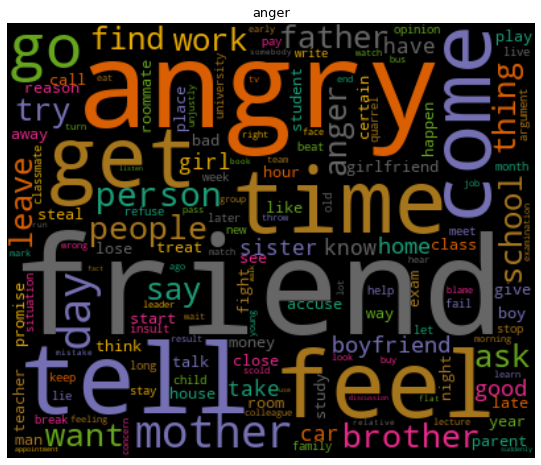

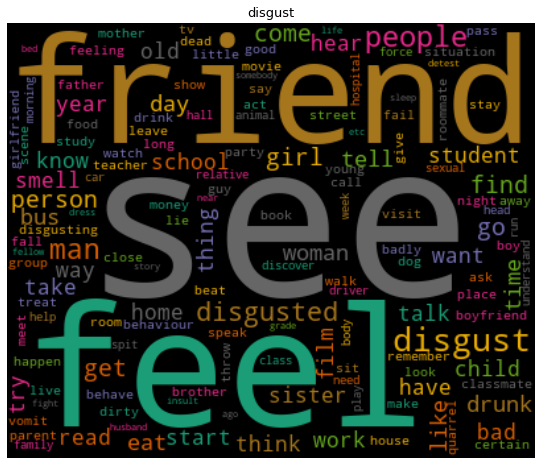

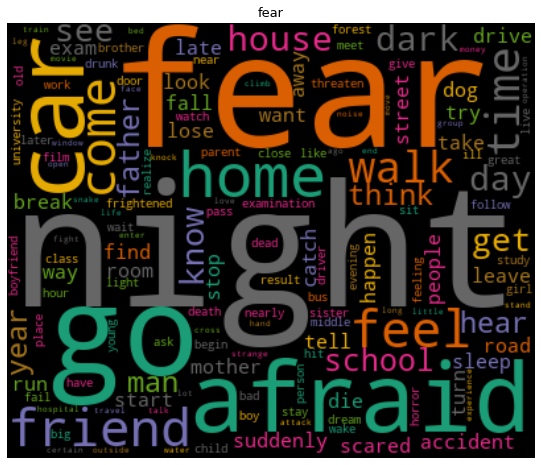

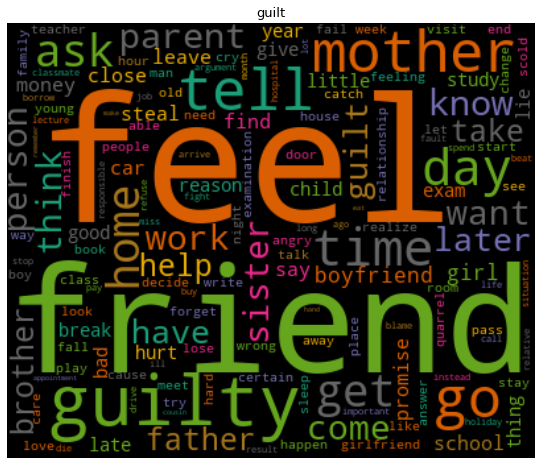

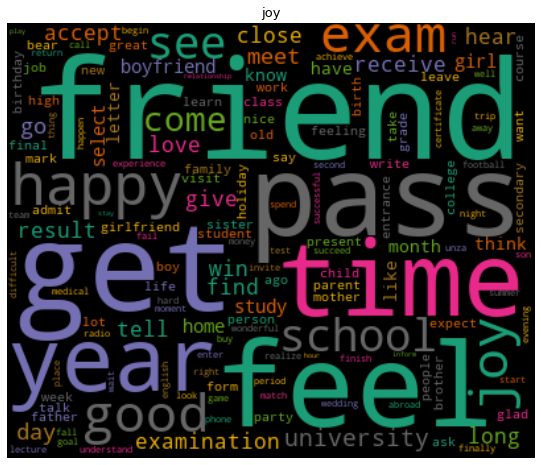

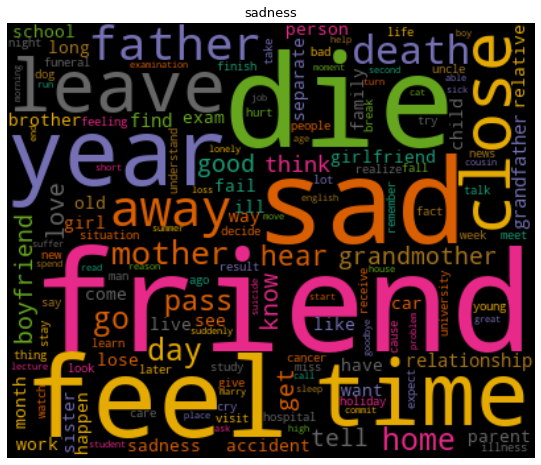

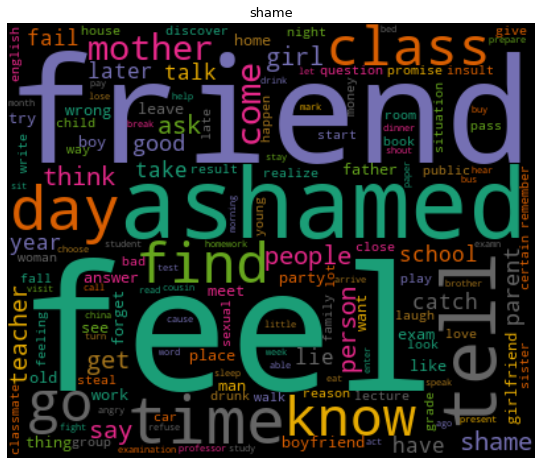

In [29]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)